https://github.com/AndyQ-262/F1_data/tree/main

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Formula 1 data from URLs into Pandas DataFrames
url_1 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/results.csv"
results_df = pd.read_csv(url_1, sep=',')

url_2 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/qualifying.csv"
qualifying_df = pd.read_csv(url_2, sep=',')

url_3 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/lap_times.csv"
lap_times_df = pd.read_csv(url_3, sep=',')

url_4 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/drivers.csv"
drivers_df = pd.read_csv(url_4, sep=',')

url_5 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/constructors.csv"
constructors_df = pd.read_csv(url_5, sep=',')

url_6 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/races.csv"
races_df = pd.read_csv(url_6, sep=',')

url_7 = "https://raw.githubusercontent.com/AndyQ-262/F1_data/main/circuits.csv"
circuits_df = pd.read_csv(url_7, sep=",")

In [3]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [5]:
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [6]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


#Features: Name, Qualifying, Grid Position, Circuit, nationality, Experience in F1 (years in f1), Team nationality
#Targets: Was on Podium

In [8]:
# Selecting specific columns from results_df
results_df = results_df[["driverId", "raceId", "constructorId", "grid", "positionOrder"]]

# Dropping unnecessary columns from qualifying_df
qualifying_df = qualifying_df.drop(["qualifyId", "position", "number"], axis='columns')

# Selecting specific columns from races_df and renaming 'name' column to 'race name'
races_df = races_df[["raceId", "circuitId", "name", "date", "time", "round"]]
races_df = races_df.rename(columns={'name': 'race name'})

# Selecting specific columns from circuits_df and renaming 'name' column to 'circuit name'
circuits_df = circuits_df[["circuitId", "name"]]
circuits_df = circuits_df.rename(columns={'name': 'circuit name'})

# Merging circuits_df and races_df on 'circuitId'
circuits_merge_df = pd.merge(circuits_df, races_df, on='circuitId')
circuits_merge_df = circuits_merge_df.drop("circuitId", axis='columns')

# Selecting specific columns from constructors_df and renaming columns
constructors_df = constructors_df[["constructorId", "name", "nationality"]]
constructors_df = constructors_df.rename(columns={'name': 'constructor name', 'nationality': 'constructor nationality'})

# Selecting specific columns from drivers_df and renaming the 'nationality' column
drivers_df = drivers_df[["driverId", "dob", "nationality", 'forename', 'surname']]
drivers_df = drivers_df.rename(columns={'nationality': 'driver nationality'})

# Merging all the DataFrames step by step
results_df = pd.merge(circuits_merge_df, results_df, on='raceId')
results_df = pd.merge(qualifying_df, results_df, on=['raceId', 'driverId', 'constructorId'])
results_df = pd.merge(constructors_df, results_df, on=['constructorId'])
results_df = pd.merge(drivers_df, results_df, on=['driverId'])
results_df = results_df.drop(["constructorId", "raceId"], axis='columns')

#Combine first name and last name into one column
results_df['driver name'] = results_df['forename'] + ' ' + results_df['surname']
results_df = results_df.drop(["forename"], axis='columns')
results_df = results_df.drop(["surname"], axis='columns')

# Creating a new column 'onPodium' based on 'positionOrder'
results_df['onPodium'] = results_df['positionOrder'].apply(lambda x: 1 if x <= 3 else 0)
results_df = results_df.drop("positionOrder", axis='columns')

# Converting selected columns to categorical data type
results_df['driverId'] = results_df['driverId'].astype('category')
results_df['onPodium'] = results_df['onPodium'].astype('category')
results_df['grid'] = results_df['grid'].astype('category')
results_df['round'] = results_df['round'].astype('category')

# Converting 'dob' and 'date' columns to datetime format
results_df['dob'] = pd.to_datetime(results_df['dob'])
results_df['date'] = pd.to_datetime(results_df['date'])

# Calculating age based on 'dob' and 'date'
results_df['age'] = (results_df['date'] - results_df['dob']).dt.days // 365

# Dropping unnecessary columns
results_df = results_df.drop(["dob"], axis='columns')
results_df['date'] = results_df['date'].dt.year.astype(str)
results_df = results_df.drop(["time"], axis='columns')

# Handling missing values and converting time columns to seconds
results_df['q1'] = pd.to_datetime(results_df['q1'], format='%M:%S.%f', errors='coerce').dt.minute * 60 + pd.to_datetime(results_df['q1'], format='%M:%S.%f', errors='coerce').dt.second + pd.to_datetime(results_df['q1'], format='%M:%S.%f', errors='coerce').dt.microsecond / 1e6
results_df['q2'] = pd.to_datetime(results_df['q2'], format='%M:%S.%f', errors='coerce').dt.minute * 60 + pd.to_datetime(results_df['q2'], format='%M:%S.%f', errors='coerce').dt.second + pd.to_datetime(results_df['q2'], format='%M:%S.%f', errors='coerce').dt.microsecond / 1e6
results_df['q3'] = pd.to_datetime(results_df['q3'], format='%M:%S.%f', errors='coerce').dt.minute * 60 + pd.to_datetime(results_df['q3'], format='%M:%S.%f', errors='coerce').dt.second + pd.to_datetime(results_df['q3'], format='%M:%S.%f', errors='coerce').dt.microsecond / 1e6

In [9]:
results_df = results_df.drop(["driver name"], axis='columns')

In [10]:
results_df

,driverId,driver nationality,constructor name,constructor nationality,q1,q2,q3,circuit name,race name,date,round,grid,onPodium,age
0,1,British,McLaren,British,86.572,85.187,86.714,Albert Park Grand Prix Circuit,Australian Grand Prix,2008,1,1,1,23
1,1,British,McLaren,British,95.392,94.627,96.709,Sepang International Circuit,Malaysian Grand Prix,2008,2,9,0,23
2,1,British,McLaren,British,92.750,91.922,93.292,Bahrain International Circuit,Bahrain Grand Prix,2008,3,3,0,23
3,1,British,McLaren,British,81.366,80.825,82.096,Circuit de Barcelona-Catalunya,Spanish Grand Prix,2008,4,5,1,23
4,1,British,McLaren,British,86.192,86.477,87.923,Istanbul Park,Turkish Grand Prix,2008,5,3,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,858,American,Williams,British,83.337,NaN,NaN,Circuit Gilles Villeneuve,Canadian Grand Prix,2023,8,18,0,22
9801,858,American,Williams,British,65.948,NaN,NaN,Red Bull Ring,Austrian Grand Prix,2023,9,18,0,22
9802,858,American,Williams,British,89.873,89.031,NaN,Silverstone Circuit,British Grand Prix,2023,10,14,0,22
9803,858,American,Williams,British,79.248,NaN,NaN,Hungaroring,Hungarian Grand Prix,2023,11,20,0,22


C:\Users\ANDYQU~1\AppData\Local\Temp/ipykernel_27488/2231791779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=onPodium_drivers_df, y='driver nationality', order=onPodium_drivers_df['driver nationality'].value_counts().index, palette='muted')


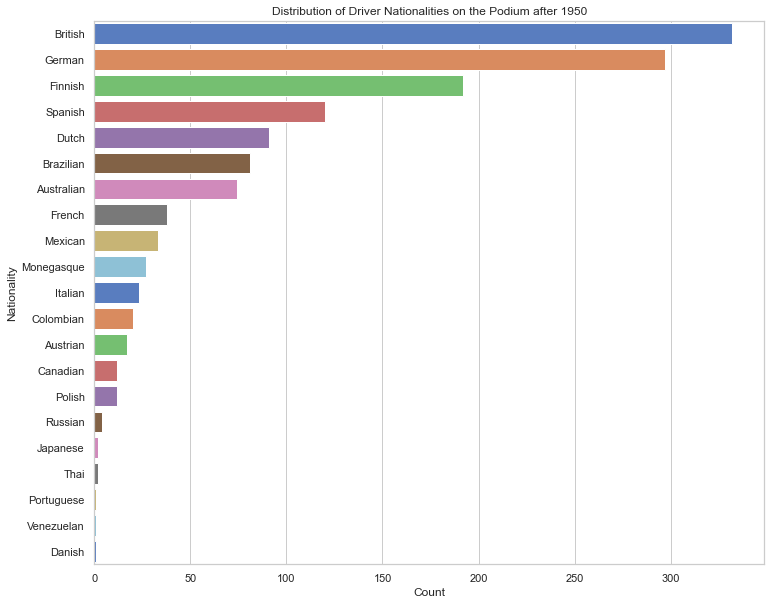

C:\Users\ANDYQU~1\AppData\Local\Temp/ipykernel_27488/2231791779.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=onPodium_drivers_df, y='constructor nationality', order=onPodium_drivers_df['constructor nationality'].value_counts().index, palette='muted')


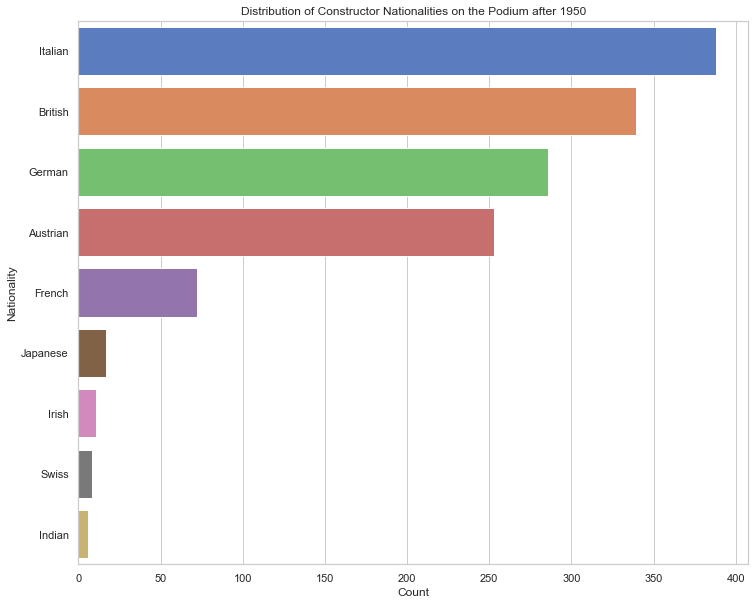

C:\Users\ANDYQU~1\AppData\Local\Temp/ipykernel_27488/2231791779.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=onPodium_drivers_df, y='constructor name', order=onPodium_drivers_df['constructor name'].value_counts().index, palette='muted')


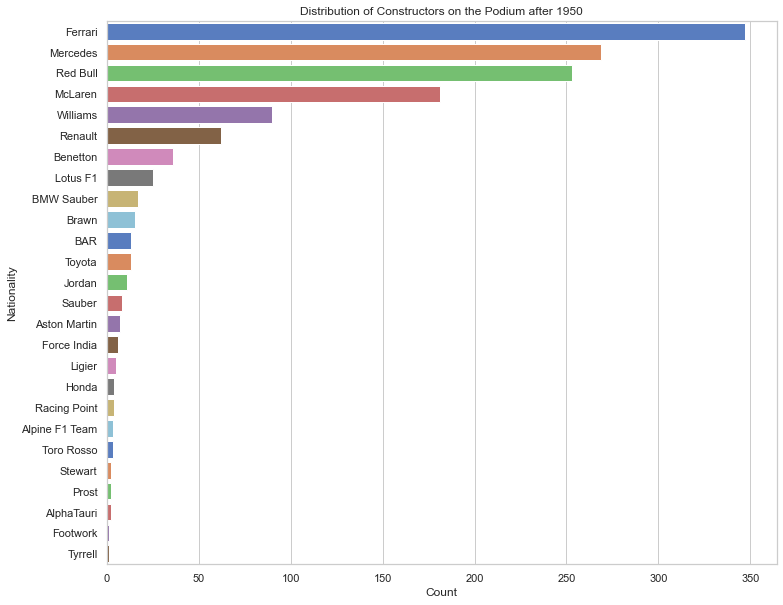

In [11]:
onPodium_drivers_df = results_df[results_df['onPodium'] == 1]
sns.set(style="whitegrid")

# Driver Nationalities on podium
plt.figure(figsize=(12, 10))
sns.countplot(data=onPodium_drivers_df, y='driver nationality', order=onPodium_drivers_df['driver nationality'].value_counts().index, palette='muted')
plt.title('Distribution of Driver Nationalities on the Podium after 1950')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

# Drivers on podium
plt.figure(figsize=(12, 10))
sns.countplot(data=onPodium_drivers_df, y='constructor nationality', order=onPodium_drivers_df['constructor nationality'].value_counts().index, palette='muted')
plt.title('Distribution of Constructor Nationalities on the Podium after 1950')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

# Constructors on podium
plt.figure(figsize=(12, 10))
sns.countplot(data=onPodium_drivers_df, y='constructor name', order=onPodium_drivers_df['constructor name'].value_counts().index, palette='muted')
plt.title('Distribution of Constructors on the Podium after 1950')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_cols = results_df.select_dtypes(include='number').columns.to_list()
cat_cols = results_df.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
cat_cols.remove("onPodium")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )


In [14]:
num_cols

['q1', 'q2', 'q3', 'age']

In [15]:
cat_cols

['driverId',
 'driver nationality',
 'constructor name',
 'constructor nationality',
 'circuit name',
 'race name',
 'date',
 'round',
 'grid']

In [16]:
# Apply the preprocessing pipeline on the dataset
results_prepared = preprocessing.fit_transform(results_df)


In [17]:
# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()


In [18]:
#results_prepared is originally a csr_matrix
results_prepared = results_prepared.toarray()

In [19]:
#merging the data and column labels into a dataframe
results_prepared_df = pd.DataFrame(data=results_prepared, columns = feature_names)
results_prepared_df

,num__q1,num__q2,num__q3,num__age,cat__driverId_1,cat__driverId_2,cat__driverId_3,cat__driverId_4,cat__driverId_5,cat__driverId_6,...,cat__grid_18,cat__grid_19,cat__grid_20,cat__grid_21,cat__grid_22,cat__grid_23,cat__grid_24,cat__grid_25,cat__grid_26,remainder__onPodium
0,-0.139569,-0.321217,-0.145702,-0.977165,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.428218,0.724550,1.246626,-0.977165,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.258140,0.424889,0.770630,-0.977165,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.474705,-0.804442,-0.789002,-0.977165,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.164031,-0.178311,0.022714,-0.977165,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,-0.347822,0.000000,0.000000,-1.180546,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9801,-1.467238,0.000000,0.000000,-1.180546,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9802,0.072933,0.104623,0.000000,-1.180546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9803,-0.611051,0.000000,0.000000,-1.180546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
results_prepared_df.columns

Index(['num__q1', 'num__q2', 'num__q3', 'num__age', 'cat__driverId_1',
       'cat__driverId_2', 'cat__driverId_3', 'cat__driverId_4',
       'cat__driverId_5', 'cat__driverId_6',
       ...
       'cat__grid_18', 'cat__grid_19', 'cat__grid_20', 'cat__grid_21',
       'cat__grid_22', 'cat__grid_23', 'cat__grid_24', 'cat__grid_25',
       'cat__grid_26', 'remainder__onPodium'],
      dtype='object', length=430)

In [21]:
from sklearn.model_selection import train_test_split

#split the target
X = results_prepared_df.drop(["remainder__onPodium"], axis=1)
y = results_prepared_df["remainder__onPodium"]

#split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7844, 429) (7844,) (1961, 429) (1961,)


# Learning Models


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Logistic Regression

In [23]:
#model_log = LogisticRegression()

logistic_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

#train on 80% of dataset
logistic_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Make predictions on the test set
y_pred_LR = logistic_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred_LR)
print(f'Test Accuracy Score (Logistic Regression): {accuracy}')

Test Accuracy Score (Logistic Regression): 0.88883222845487


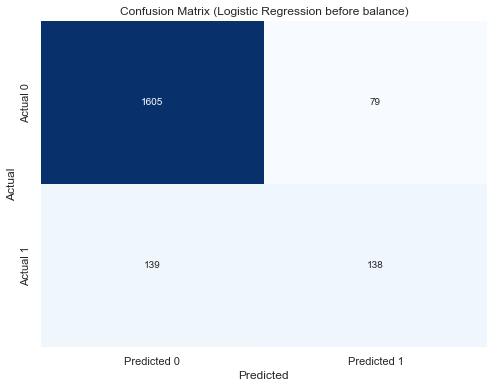

In [25]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression before balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
#display classification report
report_LR = classification_report(y_test, y_pred_LR)
report_LR_dict = classification_report(y_test, y_pred_LR, output_dict=True)
print(report_LR)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1684
         1.0       0.64      0.50      0.56       277

    accuracy                           0.89      1961
   macro avg       0.78      0.73      0.75      1961
weighted avg       0.88      0.89      0.88      1961



In [27]:
#Cross validation using 10 folds
scores_log = cross_val_score(logistic_classifier, X_train, y_train, cv=10)
print('Logistic Regression Cross-Validation Accuracy Scores', scores_log)

Logistic Regression Cross-Validation Accuracy Scores [0.89426752 0.90318471 0.90063694 0.89936306 0.8877551  0.9005102
 0.90816327 0.90178571 0.90433673 0.90943878]


In [28]:
scores_log = pd.Series(scores_log)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_log.min(), scores_log.mean(), scores_log.max())

0.8877551020408163 0.900944202521773 0.9094387755102041


Random Forest

In [29]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
y_pred_RF = logistic_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred_RF)
print(f'Test Accuracy Score (Logistic Regression): {accuracy}')

Test Accuracy Score (Logistic Regression): 0.88883222845487


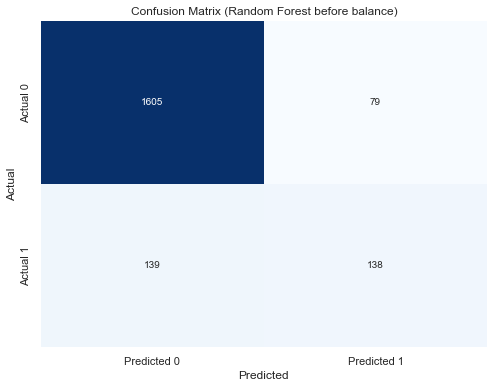

In [31]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest before balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
#display classification report
report_RF = classification_report(y_test, y_pred_RF)
report_RF_dict = classification_report(y_test, y_pred_RF, output_dict=True)
print(report_RF)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1684
         1.0       0.64      0.50      0.56       277

    accuracy                           0.89      1961
   macro avg       0.78      0.73      0.75      1961
weighted avg       0.88      0.89      0.88      1961



In [33]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score (Random Forest): {accuracy}')

Test Accuracy Score (Random Forest): 0.8832228454869965


In [34]:
#Cross validation using 10 folds
scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=10)
print('Random Forest Cross-Validation Accuracy Scores', scores_rf)

Random Forest Cross-Validation Accuracy Scores [0.88789809 0.8955414  0.88789809 0.88535032 0.89668367 0.90178571
 0.89285714 0.89540816 0.88647959 0.90688776]


In [35]:
scores_rf = pd.Series(scores_log)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_rf.min(), scores_rf.mean(), scores_rf.max())

0.8877551020408163 0.900944202521773 0.9094387755102041


SVM

In [97]:
# Initialize SVM classifier
svm_classifier = SVC(probability=True, random_state=42)

# train model
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [37]:
# Make predictions on the test set
y_pred_SVM = svm_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred_SVM)
print(f'Test Accuracy Score (SVM): {accuracy}')

Test Accuracy Score (SVM): 0.8913819479857216


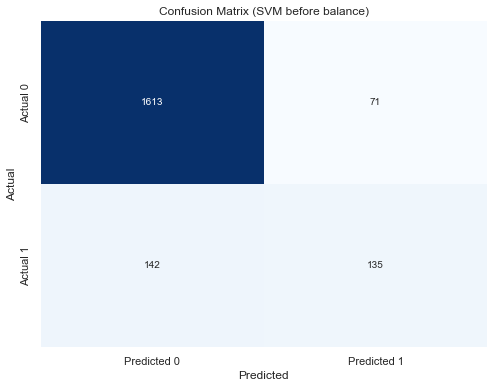

In [38]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM before balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
#display classification report
report_SVM = classification_report(y_test, y_pred_SVM)
report_SVM_dict = classification_report(y_test, y_pred_SVM, output_dict=True)
print(report_SVM)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1684
         1.0       0.66      0.49      0.56       277

    accuracy                           0.89      1961
   macro avg       0.79      0.72      0.75      1961
weighted avg       0.88      0.89      0.88      1961



In [40]:
#Cross validation using 10 folds
score_svm = cross_val_score(svm_classifier, X_train, y_train, cv=10)
print('SVM Cross-Validation Accuracy Scores', score_svm)

SVM Cross-Validation Accuracy Scores [0.89681529 0.89808917 0.8955414  0.89808917 0.89668367 0.89923469
 0.90816327 0.90816327 0.89540816 0.91836735]


In [41]:
scores_svm = pd.Series(scores_log)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_svm.min(), scores_svm.mean(), scores_svm.max())

0.8877551020408163 0.900944202521773 0.9094387755102041


# Balancing

Use SMOTE

In [42]:
# Importing the Synthetic Minority Over-sampling Technique (SMOTE) from imbalanced-learn library
from imblearn.over_sampling import SMOTE

# Creating a SMOTE instance with a specified random state and sampling strategy
# Random state ensures reproducibility, and sampling strategy determines the ratio of minority to majority class after resampling
sm = SMOTE(random_state = 12, sampling_strategy=1.0)

# Applying SMOTE to the training data to balance the class distribution
# X_train_res contains the resampled features, and y_train_res contains the corresponding resampled labels
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

logistic classifier (after balance)

In [43]:
# train model
logistic_classifier.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [44]:
# Make predictions on the test set
y_pred_LR_bal = logistic_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred_LR_bal)
print(f'Test Accuracy Score (Logistic Regression): {accuracy}')

Test Accuracy Score (Logistic Regression): 0.8643549209586946


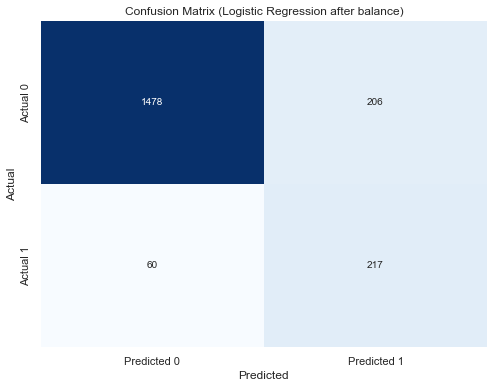

In [45]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR_bal)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression after balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
#display classification report
report_LR_Bal = classification_report(y_test,y_pred_LR_bal)
report_LR_Bal_dict = classification_report(y_test, y_pred_LR_bal, output_dict=True)
print(report_LR_Bal)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1684
         1.0       0.51      0.78      0.62       277

    accuracy                           0.86      1961
   macro avg       0.74      0.83      0.77      1961
weighted avg       0.90      0.86      0.88      1961



In [47]:
#Cross validation using 10 folds
scores_log = cross_val_score(logistic_classifier, X_train_res, y_train_res, cv=10)
print('Logistic Regression Balance Cross-Validation Accuracy Scores', scores_log)

Logistic Regression Balance Cross-Validation Accuracy Scores [0.85322461 0.87842847 0.89688427 0.90281899 0.89243323 0.89688427
 0.90949555 0.89910979 0.88649852 0.90652819]


In [48]:
scores_log = pd.Series(scores_log)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_log.min(), scores_log.mean(), scores_log.max())

0.8532246108228317 0.8922305895343952 0.9094955489614244


Random Forest (after balance)

Adjust the thereshold of random forest to improve recall

In [49]:
# train model
rf_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred_RF_bal= rf_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred_RF_bal)
print(f'Test Accuracy Score (Random Forest): {accuracy}')

Test Accuracy Score (Random Forest): 0.8862825089240184


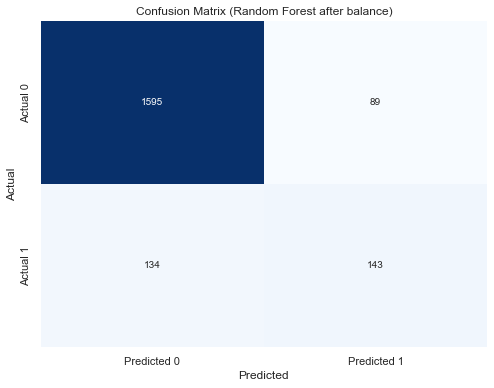

In [51]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF_bal)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest after balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
#display classification report
report_RF_Bal = classification_report(y_test, y_pred_RF_bal)
report_RF_Bal_dict = classification_report(y_test, y_pred_RF_bal, output_dict=True)
print(report_RF_Bal)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1684
         1.0       0.62      0.52      0.56       277

    accuracy                           0.89      1961
   macro avg       0.77      0.73      0.75      1961
weighted avg       0.88      0.89      0.88      1961



In [53]:
#Cross validation using 10 folds
scores_rf = cross_val_score(rf_classifier, X_train_res, y_train_res, cv=10)
print('Random Forest Balance Cross-Validation Accuracy Scores', scores_log)

Random Forest Balance Cross-Validation Accuracy Scores 0    0.853225
1    0.878428
2    0.896884
3    0.902819
4    0.892433
5    0.896884
6    0.909496
7    0.899110
8    0.886499
9    0.906528
dtype: float64


In [54]:
scores_rf = pd.Series(scores_rf)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_rf.min(), scores_rf.mean(), scores_rf.max())

0.8561897702001483 0.9538012001416589 0.9851632047477745


SVM (after balance)

In [55]:
# train model
svm_classifier.fit(X_train_res, y_train_res)

SVC(random_state=42)

In [56]:
# Make predictions on the test set
y_pred_svm_bal = svm_classifier.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score (SVM): {accuracy}')

Test Accuracy Score (SVM): 0.8832228454869965


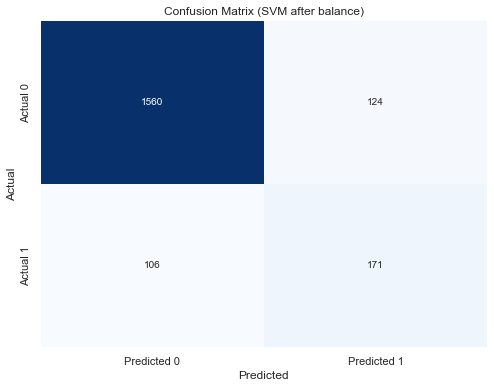

In [57]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_bal)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM after balance)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
#display classification report
report_SVM_Bal = classification_report(y_test, y_pred_svm_bal)
report_SVM_Bal_dict = classification_report(y_test, y_pred_svm_bal, output_dict=True)
print(report_SVM_Bal)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      1684
         1.0       0.58      0.62      0.60       277

    accuracy                           0.88      1961
   macro avg       0.76      0.77      0.76      1961
weighted avg       0.89      0.88      0.88      1961



In [59]:
#Cross validation using 10 folds
scores_SVM = cross_val_score(svm_classifier, X_train_res, y_train_res, cv=10)
print('SVM Balance Cross-Validation Accuracy Scores', scores_log)

SVM Balance Cross-Validation Accuracy Scores 0    0.853225
1    0.878428
2    0.896884
3    0.902819
4    0.892433
5    0.896884
6    0.909496
7    0.899110
8    0.886499
9    0.906528
dtype: float64


In [60]:
scores_SVM = pd.Series(scores_SVM)
#min, mean, max of Cross-Validation Accuracy Scores
print(scores_SVM.min(), scores_SVM.mean(), scores_SVM.max())

0.888065233506301 0.9470462239311239 0.9725519287833828


# Fine Tuning


Use randomsearchCV to tune the hyperparameters

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

Logistical regression (After tuning)

In [62]:
# Hyperparameter search space for a logistic regression model using randomized search
param_dist = {
    'C': np.logspace(-3, 3, 7), # Regularization strength, log-scale values from 0.001 to 1000
    'penalty': ['l1', 'l2'], # Regularization penalty
    'class_weight': [None, 'balanced'], # Weighting of classes
    'solver': ['liblinear', 'saga', 'lbfgs'] # Optimization algorithm
}

In [63]:
# Creating a RandomizedSearchCV instance for hyperparameter tuning of a logistic regression model
random_search_LR = RandomizedSearchCV(logistic_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

In [64]:
# train model
random_search_LR.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   random_state=42)

In [65]:
# display best parameters
print("Best Parameters: ", random_search_LR.best_params_)

Best Parameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'C': 100.0}


In [66]:
best_model_log = random_search_LR.best_estimator_

# Make predictions on the test set
y_pred_LR_tune = best_model_log.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score (SVM): {accuracy}')

Test Accuracy Score (SVM): 0.8832228454869965


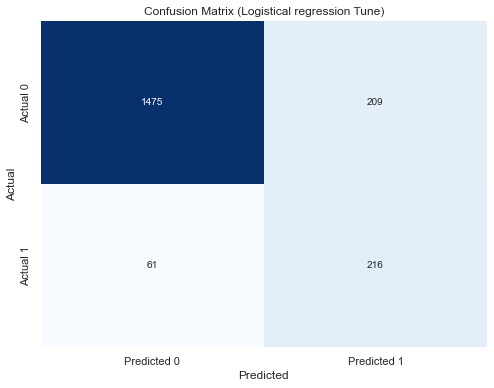

In [67]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR_tune)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistical regression Tune)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
#display classification report
report_LR_Hyper = classification_report(y_test, y_pred_LR_tune)
report_LR_Hyper_dict = classification_report(y_test, y_pred_LR_tune, output_dict=True)
print(report_LR_Hyper)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1684
         1.0       0.51      0.78      0.62       277

    accuracy                           0.86      1961
   macro avg       0.73      0.83      0.77      1961
weighted avg       0.90      0.86      0.87      1961



Random forest (After tuning)

In [69]:
# Hyperparameter grid for a RandomForestClassifier, specifying different values for tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Weights associated with classes to address class imbalance
}

In [70]:
# Creating a RandomizedSearchCV instance for hyperparameter tuning of a Random Forest model
random_search_RF = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

In [71]:
# train the model
random_search_RF.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [72]:
# display best parameters
print("Best Parameters: ", random_search_RF.best_params_)

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}


In [73]:
best_model_rf = random_search_RF.best_estimator_

# Make predictions on the test set
y_pred_rf_tune = best_model_rf.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score (SVM): {accuracy}')

Test Accuracy Score (SVM): 0.8832228454869965


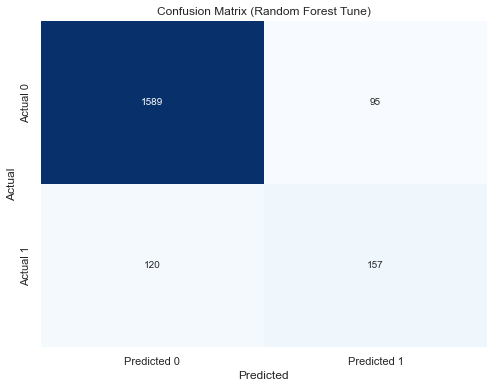

In [74]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_tune)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest Tune)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
#display classification report
report_RF_Hyper = classification_report(y_test, y_pred_rf_tune)
report_RF_Hyper_dict = classification_report(y_test, y_pred_rf_tune, output_dict=True)
print(report_RF_Hyper)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1684
         1.0       0.62      0.57      0.59       277

    accuracy                           0.89      1961
   macro avg       0.78      0.76      0.77      1961
weighted avg       0.89      0.89      0.89      1961



SVM (After tuning)

In [98]:
# Defining a parameter grid for hyperparameter tuning in a Support Vector Machine (SVM) classifier
param_dist = {
    'C': [0.1, 0.01, 0.001], # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel function to be used in the algorithm
    'gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1.0], # Coefficient for 'rbf', 'poly', and 'sigmoid' kernels
    'degree': [2, 3, 4] # Polynomial degree for 'poly' kernel
}

In [99]:
# Creating a RandomizedSearchCV instance for hyperparameter tuning of a SVM model
random_search_SVM = RandomizedSearchCV(svm_classifier,param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

In [100]:
#train the model
random_search_SVM.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.01, 0.001],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  0.5, 1.0],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42)

In [101]:
# display best parameters
print("Best Parameters: ", random_search_SVM.best_params_)

Best Parameters:  {'kernel': 'linear', 'gamma': 1.0, 'degree': 2, 'C': 0.1}


In [102]:
best_model_svm = random_search_SVM.best_estimator_

# Make predictions on the test set
y_pred_svm_tune = best_model_svm.predict(X_test)

# display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score (SVM): {accuracy}')

Test Accuracy Score (SVM): 0.8832228454869965


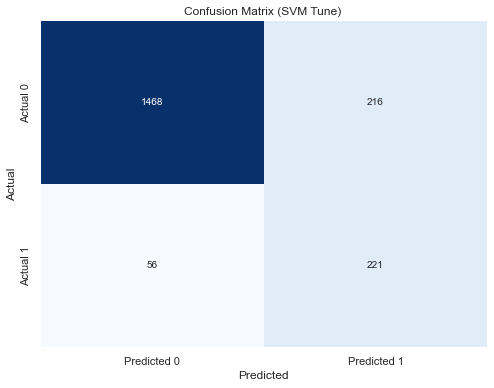

In [103]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tune)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM Tune) ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [104]:
#display classification report
report_SVM_Hyper = classification_report(y_test, y_pred_svm_tune)
report_SVM_Hyper_dict = classification_report(y_test, y_pred_svm_tune, output_dict=True)
print(report_SVM_Hyper)

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92      1684
         1.0       0.51      0.80      0.62       277

    accuracy                           0.86      1961
   macro avg       0.73      0.83      0.77      1961
weighted avg       0.90      0.86      0.87      1961



# Comparison of models

In [106]:
model_names = ['LR', 'RF', 'SVM']

In [107]:
reports = [report_LR_dict, report_RF_dict, report_SVM_dict]

Using the positive class (1.0) to compare the metrics of each model  

For the models before the dataset was balanced

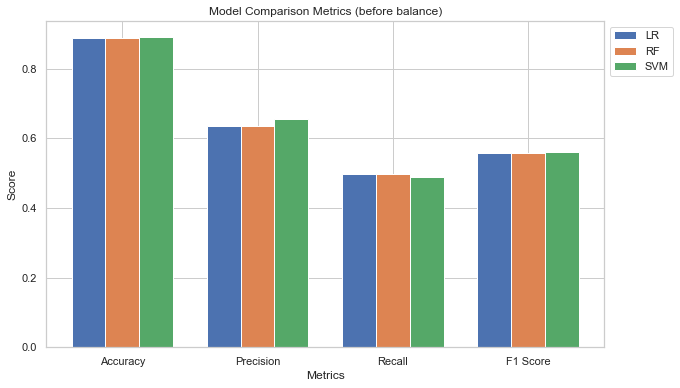

In [109]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (report, name) in enumerate(zip(reports, model_names)):
    values = [
        report['accuracy'],
        report['1.0']['precision'],
        report['1.0']['recall'],
        report['1.0']['f1-score']
    ]

    # Plot the bars for each model
    plt.bar(np.arange(len(metrics)) + i * bar_width, values, bar_width, label=name)

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison Metrics (before balance)')
plt.xticks(np.arange(len(metrics)) + bar_width, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

After balancing

In [110]:
reports = [report_LR_Bal_dict, report_RF_Bal_dict, report_SVM_Bal_dict]

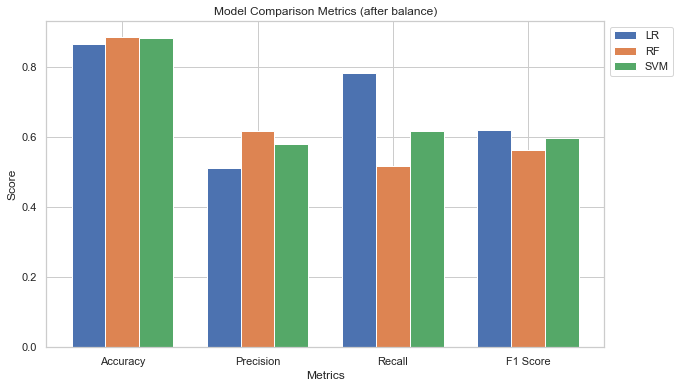

In [111]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (report, name) in enumerate(zip(reports, model_names)):
    values = [
        report['accuracy'],
        report['1.0']['precision'],
        report['1.0']['recall'],
        report['1.0']['f1-score']
    ]

    # Plot the bars for each model
    plt.bar(np.arange(len(metrics)) + i * bar_width, values, bar_width, label=name)

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison Metrics (after balance)')
plt.xticks(np.arange(len(metrics)) + bar_width, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

After tuning

In [112]:
reports = [report_LR_Hyper_dict, report_RF_Hyper_dict, report_SVM_Hyper_dict]

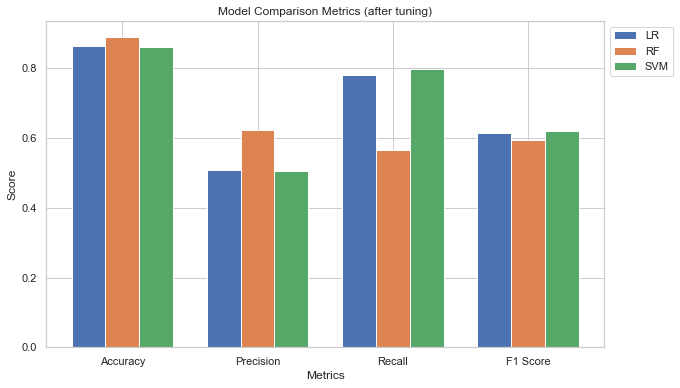

In [114]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (report, name) in enumerate(zip(reports, model_names)):
    values = [
        report['accuracy'],
        report['1.0']['precision'],
        report['1.0']['recall'],
        report['1.0']['f1-score']
    ]

    # Plot the bars for each model
    plt.bar(np.arange(len(metrics)) + i * bar_width, values, bar_width, label=name)

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison Metrics (after tuning)')
plt.xticks(np.arange(len(metrics)) + bar_width, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Best performing model
The best performing model was SVM after hyperparameters were tuned, based on recall score

In [115]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

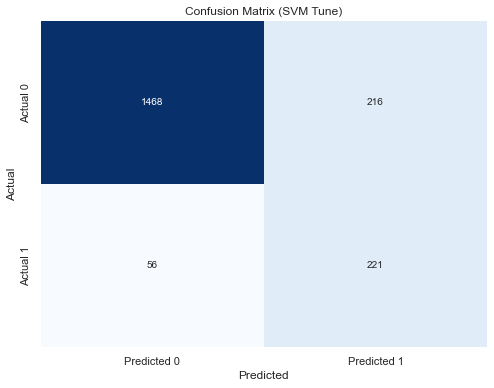

In [119]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tune)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM Tune)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

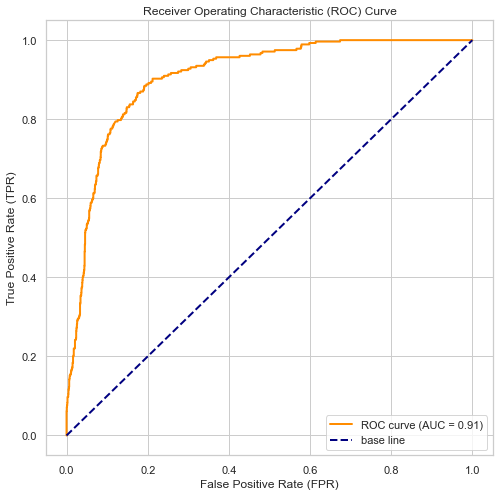

In [117]:
#display roc graph
y_prob = best_model_svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='base line')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

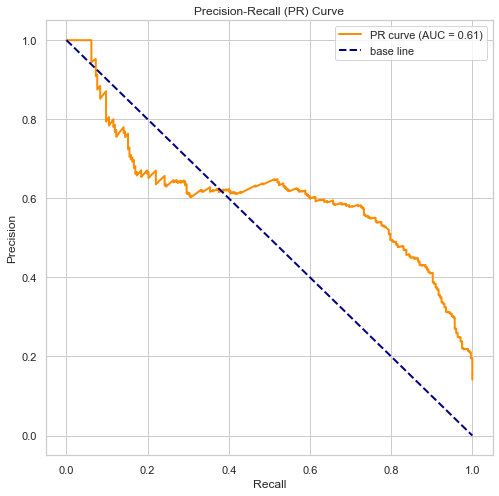

In [118]:
#display pr graph
y_prob = best_model_svm.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--', label='base line')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')

# Show the plot
plt.show()